<a href="https://colab.research.google.com/github/harnalashok/hadoop/blob/main/pyspark_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 24th March 2023
# Myfolder: github/hadoop
# Objectives:
#             i)  Learn to perform regression using pyspark
# Ref: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a


# Spark Reference API
a. [Quickstart](https://spark.apache.org/docs/latest/quick-start.html) <br>
b. Dataframe [APIs list](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html) at a glance<br>
c. Pandas [API](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html) on spark <br>
c. ALso look at useful [this source code](https://spark.apache.org/docs/latest/api/python/_modules/pyspark/sql/functions.html) of functions that has examples<br>



# A. Full spark install
Installs `pyspark (spark-3.3.2-bin-hadoop3)` and `koalas`.<br>
Takes less than a minute to install

### 1.0 Libraries

In [1]:
# 1.0 How to set environment variable
import os  
import time  

## 2.0 Define some functions

#### ssh_install()

In [2]:
# 2.0 Function to install ssh client and sshd (Server)
def ssh_install():
  print("\n--1. Download and install ssh server----\n")
  ! sudo apt-get remove openssh-client openssh-server
  ! sudo apt install openssh-client openssh-server
  
  print("\n--2. Restart ssh server----\n")
  ! service ssh restart

#### Java install

In [3]:
# 3.0 Function to download and install java 8
def install_java():
  ! rm -rf /usr/java

  print("\n--Download and install Java 8----\n")
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null        # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     # set environment variable

  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac
  
  !mkdir -p /usr/java
  ! ln -s "/usr/lib/jvm/java-8-openjdk-amd64"  "/usr/java"
  ! mv "/usr/java/java-8-openjdk-amd64"  "/usr/java/latest"
  
  !java -version       #check java version
  !javac -version

#### setup ssh passphrase

In [4]:
# 6.0 Function tp setup ssh passphrase
def set_keys():
  print("\n---22. Generate SSH keys----\n")
  ! cd ~ ; pwd 
  ! cd ~ ; ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa
  ! cd ~ ; cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
  ! cd ~ ; chmod 0600 ~/.ssh/authorized_keys


#### Set environment

In [5]:
# 7.0 Function to set up environmental variables
def set_env():
  print("\n---23. Set Environment variables----\n")
  # 'export' command does not work in colab
  # https://stackoverflow.com/a/57240319
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"   
  

#### function to install prerequisites
java and ssh<br>


In [6]:
# 8.0 Function to call all functions
def install_components():
  print("\n--Install java----\n")
  ssh_install()
  install_java()  
  #set_keys()
  set_env()


## 3.0 Install components
Start downloading, install and configure. Takes around 2 minutes<br>
Your <u>input *'y'* is required </u>at one place while overwriting earlier ssh keys

In [7]:
# 9.0 Start installation
start = time.time()
install_components()
end = time.time()
print("\n---Time taken----\n")
print((end- start)/60)


--Install java----


--1. Download and install ssh server----

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'openssh-server' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libboost-atomic-dev libboost-atomic1.71-dev libboost-atomic1.71.0
  libboost-chrono-dev libboost-chrono1.71-dev libboost-chrono1.71.0
  libboost-container-dev libboost-container1.71-dev libboost-container1.71.0
  libboost-context-dev libboost-context1.71-dev libboost-context1.71.0
  libboost-coroutine-dev libboost-coroutine1.71-dev libboost-coroutine1.71.0
  libboost-date-time-dev libboost-date-time1.71-dev libboost-date-time1.71.0
  libboost-exception-dev libboost-exception1.71-dev libboost-fiber-dev
  libboost-fiber1.71-dev libboost-fiber1.71.0 libboost-filesystem-dev
  libboost-filesystem1.71-dev libboost-filesystem1.71.0 libboost-graph-dev
  libboost-graph-parallel-dev libboost-graph-par

## 4.0 Install spark
koalas will also be installed

### Define functions

`findspark`: PySpark isn't on `sys.path` by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding `pyspark` to `sys.path` at runtime. `findspark` does the latter.

In [8]:
# 1.0 Function to download and unzip spark
def spark_koalas_install():
  print("\n--1.1 Install findspark----\n")
  !pip install -q findspark

  print("\n--1.2 Install databricks Koalas----\n")
  !pip install koalas
  
  # This download link NEEDS TO BE CHECKED AGAIN
  print("\n--1.3 Download Apache tar.gz----\n")
            
  ! wget -c https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz 

  print("\n--1.4 Transfer downloaded content and unzip tar.gz----\n")
  !  mv /content/spark*   /opt/
  ! tar -xzf /opt/spark-3.3.2-bin-hadoop3.tgz  --directory /opt/

  print("\n--1.5 Check folder for files----\n")
  ! ls -la /opt


In [9]:
# 1.1 Function to set environment
def set_spark_env():
  print("\n---2. Set Environment variables----\n")
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre" 
  os.environ["SPARK_HOME"] = "/opt/spark-3.3.2-bin-hadoop3" 
  os.environ["SPARK_CONF_DIR"] = "/opt/spark-3.3.2-bin-hadoop3/conf"     
  os.environ["LD_LIBRARY_PATH"] += ":/opt/spark-3.3.2-bin-hadoop3/lib/native"
  os.environ["PATH"] += ":/opt/spark-3.3.2-bin-hadoop3/bin:/opt/spark-3.3.2-bin-hadoop3/sbin"
  print("\n---2.1. Check Environment variables----\n")
  # Check
  ! echo $PATH
  ! echo $LD_LIBRARY_PATH

In [10]:
# 1.2 Function to configure spark 
def spark_conf():
  print("\n---3. Configure spark to access hadoop----\n")
  !mv /opt/spark-3.3.2-bin-hadoop3/conf/spark-env.sh.template  /opt/spark-3.3.2-bin-hadoop3/conf/spark-env.sh
  #!echo "HADOOP_CONF_DIR=/opt/hadoop-3.2.2/etc/hadoop/" >> /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  print("\n---3.1 Check ----\n")
  #!cat /opt/spark-3.1.1-bin-hadoop3.2/conf/spark-env.sh

### Install spark


In [11]:
# 2.0 Call all the three functions
def install_spark():
  spark_koalas_install()
  set_spark_env()
  spark_conf()


In [12]:
# 2.1 
install_spark()


--1.1 Install findspark----


--1.2 Install databricks Koalas----

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.6 MB/s eta 0:00:00

--1.3 Download Apache tar.gz----

--2023-03-24 11:22:54--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M   198MB/s    in 1.4s    

2023-03-24 11:22:55 (198 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]


--1.4 Transfer downloaded content and unzip tar.gz----


--1.5 Check folder for files----

total 292368
drwxr-xr-x  1 root root      4096 Mar 24 11:22

# B. Call Essential libraries
We do not import `pandas` but `pyspark.pandas` as `ps`.

In [13]:
# 3.0 Just call some libraries to test
import numpy as np
import os
import time 

# 3.1 Get spark in sys.path
import findspark
findspark.init()

# 3.2 Call other spark libraries
#     Just to test
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [14]:
# 3.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# 3.4 Increase cell width to display wide columnar output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# C. Build spark session
You can modify spark driver/executor memory here<br>
SparkSession name is `spark`<br>
databricks.koalas is imported as `ks`


## Modifying spark configuraion
Increase driver and executor memory

In [16]:
# 4.0 Check template file
! cat /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf.template

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Default system properties included when running spark-submit.
# This is useful for setting default environmental settings.

# Example:
# spark.master                     spark://master:7077
# spark.eventLog.enable

In [17]:
# 4.1 Create spark-defaults.conf 
! cp /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf.template  /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf


In [18]:
# 4.2 Amend properties
! echo "spark.driver.memory 6g" >> /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf
! echo "spark.executor.memory 3g" >> /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf

In [19]:
# 4.3 Check now
! cat /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Default system properties included when running spark-submit.
# This is useful for setting default environmental settings.

# Example:
# spark.master                     spark://master:7077
# spark.eventLog.enable

## Stop and start SparkSession

In [20]:
# 5.0 Build spark session:
# Stop spark, if started
#spark.stop()
# 5.1 Now start spark
spark = SparkSession. \
                    builder. \
                    master("local[*]"). \
                    appName("myexpt"). \
                    getOrCreate()

In [21]:
sc = spark.sparkContext
spark.sparkContext.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.executor.memory', '3g'),
 ('spark.driver.host', '901a60fc5863'),
 ('spark.driver.port', '42563'),
 ('spark.app.name', 'myexpt'),
 ('spark.executor.id', 'driver'),
 ('spark.app.startTime', '1679657021251'),
 ('spark.driver.me

In [22]:
# 5.2
print(spark.sparkContext._conf.getAll())

[('spark.driver.extraJavaOptions', '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'), ('spark.executor.memory', '3g'), ('spark.driver.host', '901a60fc5863'), ('spark.driver.port', '42563'), ('spark.app.name', 'myexpt'), ('spark.executor.id', 'driver'), ('spark.app.startTime', '1679657021251'), ('spark.driver.memory', '6

# D. Mount gdrive

In [23]:
# 1.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [24]:
# 1.1 List path to folder containg csv file. 
#      Note '/' at the end:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/learning_spark/advertising_data/"

In [26]:
# 1.2 Read data:
df = ps.read_csv(pathToFolder + "advertising.csv")

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [28]:
# 2.0 Explore data:
df.shape

print("\n=====\n")

df.head()


(200, 4)


=====



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Plot few graphs
See [here](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/frame.html#plotting) for what all graphs are available.

#### Density graph of Sales
See [here](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.density.html#pyspark.pandas.DataFrame.plot.density) for density graph

What are density graphs?<br>
See [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation#:~:text=In%20statistics%2C%20kernel%20density%20estimation,based%20on%20kernels%20as%20weights.)<br>
Kernel density estimates are closely related to histograms, but can be endowed with properties such as smoothness or continuity by using a suitable kernel. The diagram below based on these 6 data points illustrates this relationship:

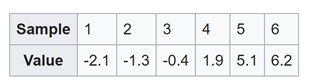

For the histogram, first, the horizontal axis is divided into sub-intervals or bins which cover the range of the data: In this case, six bins each of width 2. Whenever a data point falls inside this interval, a box of height 1/12 is placed there. If more than one data point falls inside the same bin, the boxes are stacked on top of each other.

For the kernel density estimate, normal kernels with variance 2.25 (indicated by the red dashed lines) are placed on each of the data points xi. The kernels are summed to make the kernel density estimate (solid blue curve). The smoothness of the kernel density estimate (compared to the discreteness of the histogram) illustrates how kernel density estimates converge faster to the true underlying density for continuous random variables.[

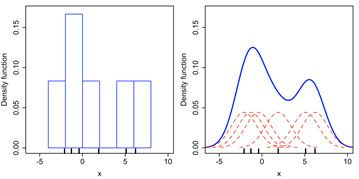

Comparison of the histogram (left) and kernel density estimate (right) constructed using the same data. The six individual kernels are the red dashed curves, the kernel density estimate the blue curves. The data points are the rug plot on the horizontal axis.

In [32]:
# 2.1 Look at the distribution of Sales:
#     Is it symmetric or skewed?
#     'bw_method' determines smoothness of graph:

df['Sales'].plot.density(bw_method = 0.3)


In [34]:
# 2.1.1 More smoothed graph:
df['Sales'].plot.density(bw_method = 3.0)

### Machine learning

#### What is VectorAssembler?

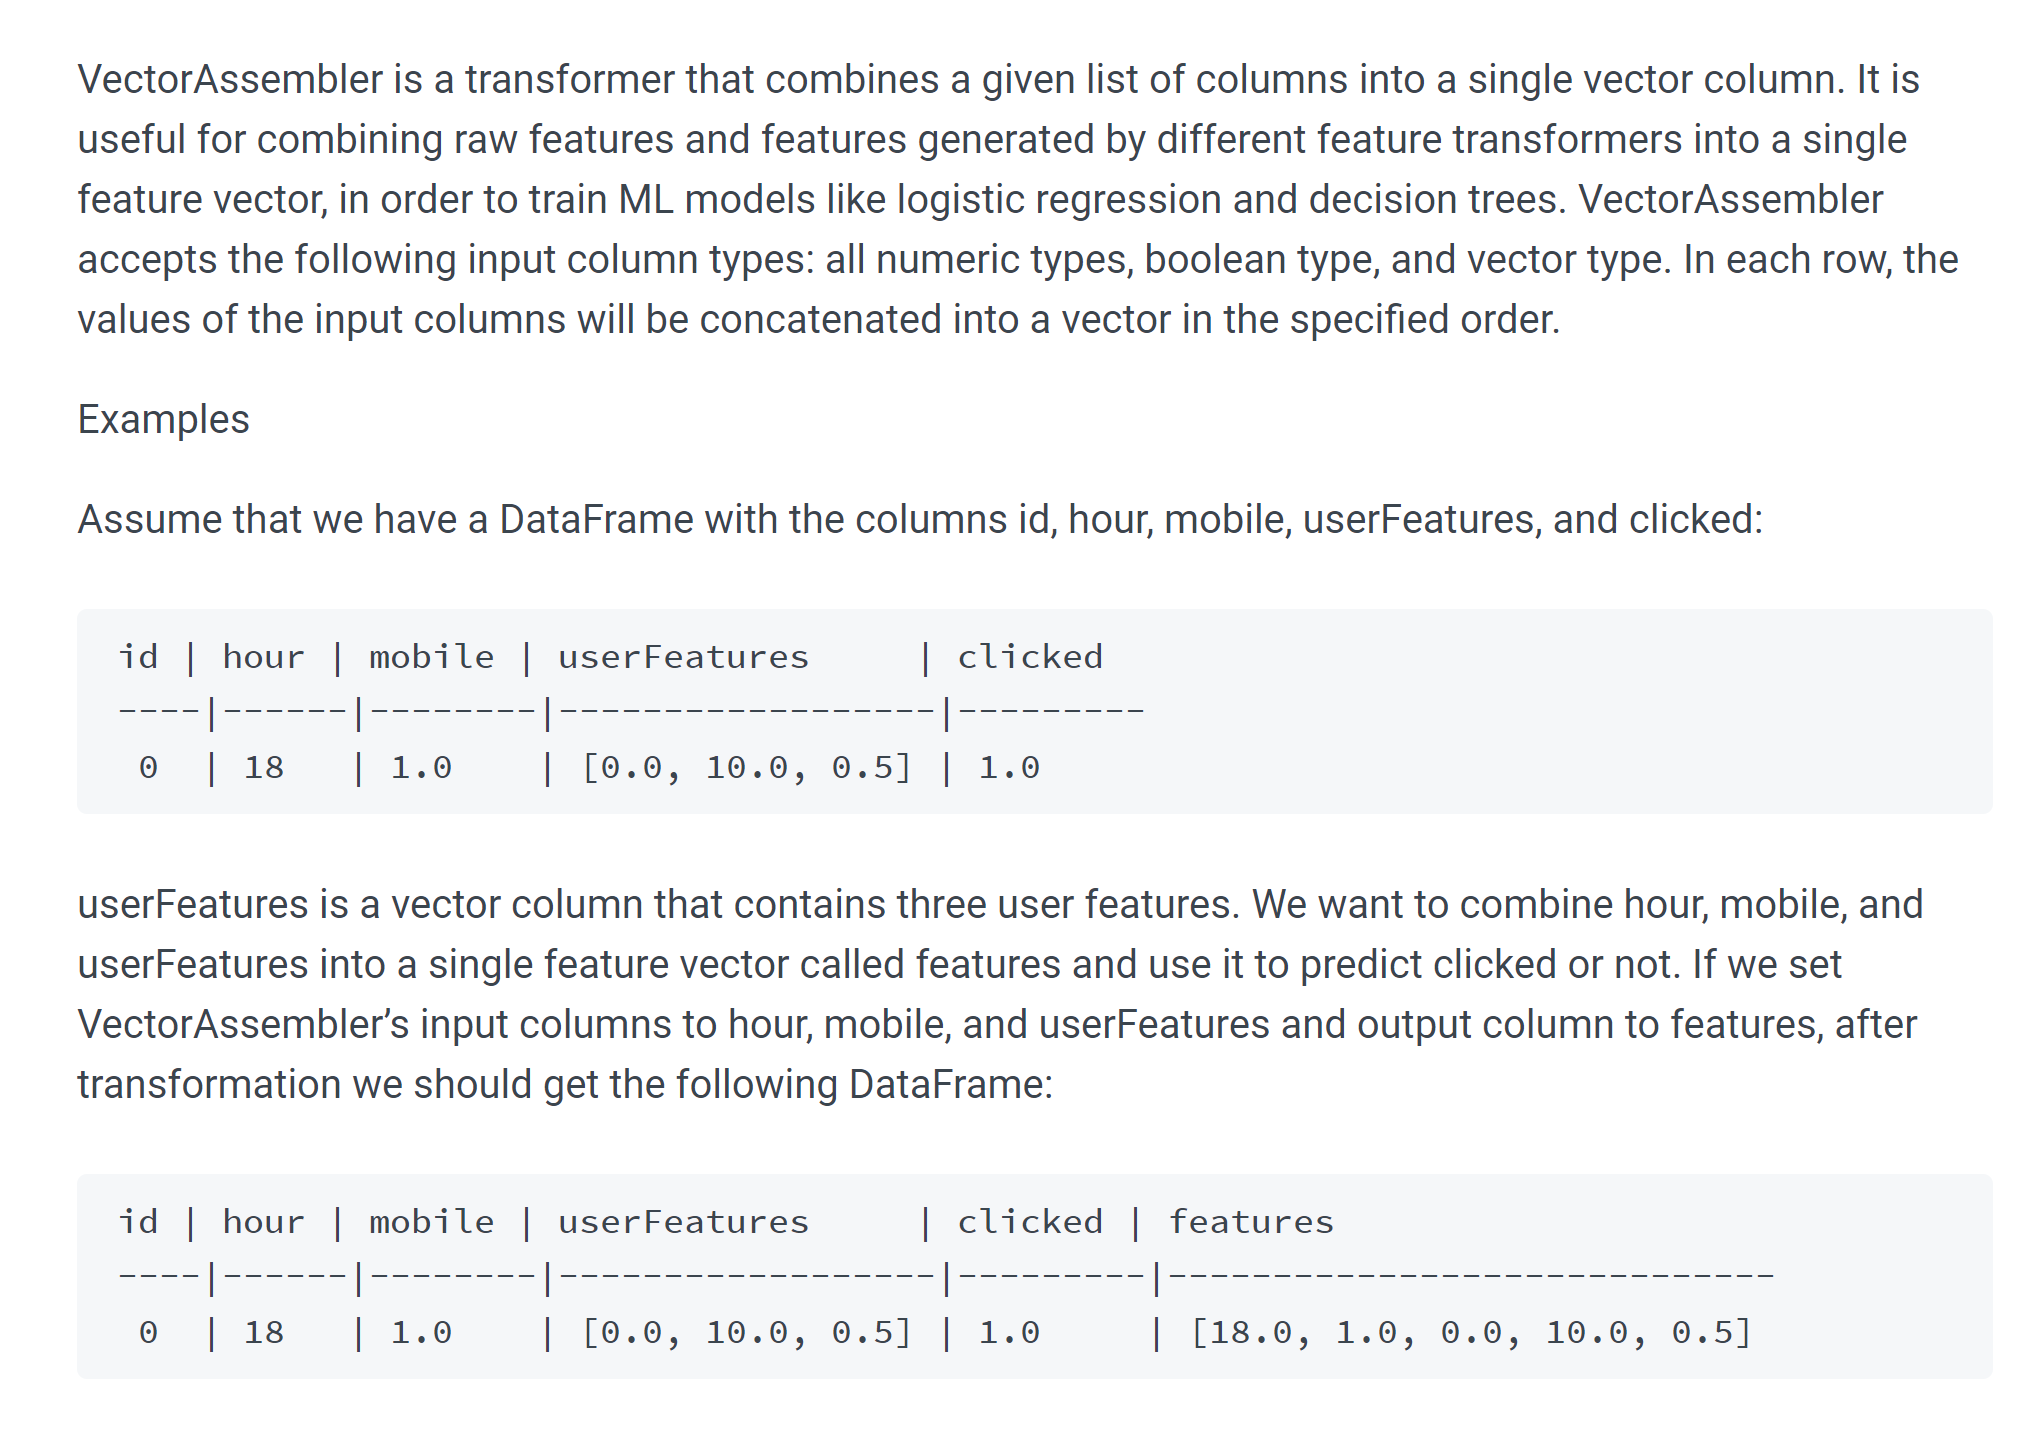

In [36]:
# 3.0 Import VectorAssembler:
from pyspark.ml.feature import VectorAssembler

In [66]:
# 3.1 Transform psypark pandas dataframe to pyspark dataframe:
spark_df = df.to_spark()

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [68]:
# 3.1.1
type(spark_df)

print("\n==========\n")

# 3.1.2
spark_df.dtypes

pyspark.sql.dataframe.DataFrame

[('TV', 'double'),
 ('Radio', 'double'),
 ('Newspaper', 'double'),
 ('Sales', 'double')]

In [70]:
# 3.1.3
spark_df.show(5)

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3| 12.0|
|151.5| 41.3|     58.5| 16.5|
|180.8| 10.8|     58.4| 17.9|
+-----+-----+---------+-----+
only showing top 5 rows



In [75]:
# 4.0 Instantiate VectorAssembler:
vectorAssembler = VectorAssembler(
                                   inputCols = ['TV',	'Radio',	'Newspaper'],
                                   outputCol = 'features'
                                  )

In [76]:
# 4.1 Transform spark_df.
#     Note that THERE IS NO fitting:

spark_df = vectorAssembler.transform(spark_df)

In [77]:
# 4.2 A column 'features' gets added:

spark_df.show(3)

+-----+-----+---------+-----+-----------------+
|   TV|Radio|Newspaper|Sales|         features|
+-----+-----+---------+-----+-----------------+
|230.1| 37.8|     69.2| 22.1|[230.1,37.8,69.2]|
| 44.5| 39.3|     45.1| 10.4| [44.5,39.3,45.1]|
| 17.2| 45.9|     69.3| 12.0| [17.2,45.9,69.3]|
+-----+-----+---------+-----+-----------------+
only showing top 3 rows



In [78]:
# 4.2.1 Check dtypes:
#       Note the dtype of 'features' column:

spark_df.dtypes

[('TV', 'double'),
 ('Radio', 'double'),
 ('Newspaper', 'double'),
 ('Sales', 'double'),
 ('features', 'vector')]

In [79]:
# 5.0 Split spark_df into train/test:

splits = spark_df.randomSplit([0.7, 0.3])
type(splits)   # list


list

In [80]:
# 5.1
train_df = splits[0]
test_df = splits[1]

In [83]:
# 5.2
train_df.show(3)
print("\n==========\n")
train_df.count()
print("\n==========\n")
test_df.count()

+---+-----+---------+-----+---------------+
| TV|Radio|Newspaper|Sales|       features|
+---+-----+---------+-----+---------------+
|4.1| 11.6|      5.7|  3.2| [4.1,11.6,5.7]|
|5.4| 29.9|      9.4|  5.3| [5.4,29.9,9.4]|
|7.3| 28.1|     41.4|  5.5|[7.3,28.1,41.4]|
+---+-----+---------+-----+---------------+
only showing top 3 rows





137

63

Elastic net includes both L1 and L2 regularisation as special instances when set properly. For example, a Lasso model is created by training a linear regression model with the elastic net parameter α set to 1. If α set to 0, on the other hand, the trained model is reduced to a ridge regression model. (Refer [here](https://www.edureka.co/community/170787/how-can-import-elastic-net-lasso-and-ridge-regression-pyspark))<br>

Where:

elasticNetParam is equivalent to α and regParam is equivalent to λ.

In [84]:
# 6.0 Import LinearRegression library:

from pyspark.ml.regression import LinearRegression

In [51]:
# 6.1 
lr = LinearRegression(
                      featuresCol = 'features',
                      labelCol='Sales',
                      maxIter=10,
                      regParam=0.3,        # alpha of elasticNet
                      elasticNetParam=0.8  # lambda of elasticNet
                      )


In [52]:
lr_model = lr.fit(train_df)


In [53]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.05116260864177558,0.09587468660492526,0.0]
Intercept: 5.409379051533406


In [55]:
trainingSummary = lr_model.summary

In [56]:
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


RMSE: 1.715038
r2: 0.893853


In [57]:
lr_predictions = lr_model.transform(test_df)

In [59]:
lr_predictions.select("prediction","Sales","features").show(5)

+------------------+-----+----------------+
|        prediction|Sales|        features|
+------------------+-----+----------------+
| 6.731292111581819|  3.2|  [4.1,11.6,5.7]|
| 8.476944788216768|  5.5| [7.3,28.1,41.4]|
|  10.5427659216977|  7.2| [8.7,48.9,75.0]|
|10.463750942214649|  8.7|[16.9,43.7,89.4]|
| 8.451716793325666|  7.0|[18.8,21.7,50.4]|
+------------------+-----+----------------+
only showing top 5 rows



In [60]:
from pyspark.ml.evaluation import RegressionEvaluator

In [61]:
lr_evaluator = RegressionEvaluator(
                                    predictionCol="prediction", \
                                    labelCol="Sales",
                                    metricName="r2"
                                    )

print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.908742


In [62]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 1.5922


In [65]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

numIterations: 9
objectiveHistory: [0.4999999999999991, 0.4147579187824404, 0.10718909283289998, 0.10686427065214876, 0.10683207474984857, 0.10683051286154353, 0.10683048729171055, 0.10683048688079023, 0.10683048687409152, 0.10683048687398267]


In [64]:
trainingSummary.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  -7.641830467137689|
| -3.2523102676862594|
| -2.9379727078708484|
| -2.7469364397782874|
| -1.2507143277230197|
| -2.2457575083639236|
| -0.8179590993826364|
|  -2.009133002623156|
|  -0.782462135252139|
|  1.3099759646619837|
| -1.9300779625663793|
| -0.8262035410542046|
| -1.3359286448626566|
| -0.7392473816712073|
| -0.7922506370405422|
| -0.5430658202319743|
| -0.6575399741885519|
| -0.9582546103549472|
|   1.620481485769501|
|-0.11852704208745735|
+--------------------+
only showing top 20 rows



In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()